In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D  #2Dfigure (word vector:1D)
from keras.utils import np_utils #Transfer numbers to 1D vectors ex: 1>>[0,1,0,0,0,0,0,0,0]
from keras.optimizers import Adam #maybe SGD, GD, Adadelta .etc 
import keras.callbacks

Using TensorFlow backend.


# ---Load training/testing data from Mnist---

http://yann.lecun.com/exdb/mnist/

In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()
#Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [4]:
print(
"Scale of x0_train:",x0_train.shape,"\n", 
"Scale of y0_train:",y0_train.shape,"\n",
"Scale of x0_test:",x0_test.shape,"\n",     
"Scale of y0_test:",y0_test.shape,"\n",
) #Check the dimensions of your input datasets.

Scale of x0_train: (60000, 28, 28) 
 Scale of y0_train: (60000,) 
 Scale of x0_test: (10000, 28, 28) 
 Scale of y0_test: (10000,) 



In [5]:
x_train = x0_train.reshape(60000, 28, 28, 1)
x_test = x0_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255
x_test = x_test / 255

In [6]:
y_train = np_utils.to_categorical(y0_train, 10)
y_test = np_utils.to_categorical(y0_test, 10)

In [7]:
print(
"Scale of x_train:",x_train.shape,"\n", 
"Scale of y_train:",y_train.shape,"\n",
"Scale of x_test:",x_test.shape,"\n",     
"Scale of y_test:",y_test.shape,"\n",
)  #Check the dimensions of your training datasets.

Scale of x_train: (60000, 28, 28, 1) 
 Scale of y_train: (60000, 10) 
 Scale of x_test: (10000, 28, 28, 1) 
 Scale of y_test: (10000, 10) 



In [8]:
print(y0_test[2])

1


# ---Modeling---

In [9]:
model = Sequential()
N_F=15 #Number of Filters
N_C=3  #Dims of Filters
N_MP=2 #Dims of MaxPooling
N_N=200 #Number of Neurals
N_CA=10 #Number of catergories

In [10]:
model.add(Conv2D(N_F, (N_C, N_C), padding='same', input_shape=(28,28,1)))  #some diff between Theano & Tensorflow
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(N_MP, N_MP)))

In [11]:
model.add(Conv2D(N_F, (N_C, N_C)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(N_MP, N_MP)))

In [12]:
model.add(Conv2D(N_F, (N_C, N_C)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(N_MP, N_MP)))

In [13]:
model.add(Flatten())
model.add(Dense(N_N))
model.add(Activation('relu'))

In [14]:
model.add(Dense(N_CA))
model.add(Activation('softmax'))

# ---Start to compile n learn this CNN---


In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
model.summary() #to check ur NN structure

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 15)        150       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        2040      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 15)          2040      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 60)                0         
__________

In [16]:
hist=model.fit(x_train, y_train, batch_size=128, epochs=12,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 27s - loss: 0.3929 - acc: 0.8835 - val_loss: 0.1168 - val_acc: 0.9660

In [17]:
result = model.predict_classes(x_test)  ##These are the predictions after training

 9984/10000 [============================>.] - ETA: 0s

In [18]:
score = model.evaluate(x_test, y_test)  #####這裡數字出問題
loss, acc = score

10000/10000 [==============================] - 2s     

In [19]:
print("loss=",loss)
print("accuracy=",acc)

loss= 0.0380492371963
accuracy= 0.9881


### Plot and some test after training

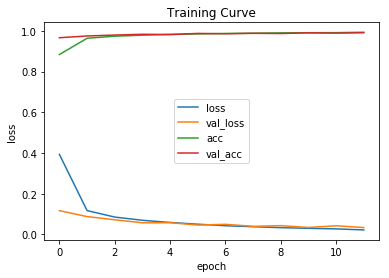

In [20]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc']) 
plt.title('Training Curve')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['loss','val_loss', 'acc','val_acc'], loc='center')  
plt.show()

In [21]:
print (hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [22]:
# Check which items we got right / wrong
correct_indices = np.nonzero(result == y0_test)[0]
incorrect_indices = np.nonzero(result != y0_test)[0]
print(np.array(incorrect_indices).ndim)
print(incorrect_indices) ##incorrect_indices,correct_indices are 2 arrays
np.array(incorrect_indices).shape

1
[ 321  445  449  582  583  659  740  938  947  951 1014 1062 1182 1192 1226
 1232 1247 1260 1299 1319 1393 1553 1621 1709 1737 1790 1878 1901 1941 1947
 1955 2040 2052 2070 2118 2130 2135 2186 2195 2293 2369 2380 2387 2414 2454
 2462 2532 2597 2654 2896 2927 2939 2953 2995 3030 3060 3100 3218 3225 3422
 3451 3503 3520 3558 3597 3702 3727 3749 3762 3767 3780 3808 3941 3976 3985
 4027 4063 4065 4078 4176 4205 4207 4224 4369 4497 4507 4521 4639 4731 4743
 4761 4807 4814 4823 4861 4956 5165 5176 5937 5972 5973 5997 6559 6576 6597
 6625 6847 7921 8091 8105 8246 8408 8527 9009 9540 9679 9729 9811 9944]


(119,)

Prediction: 7 
 Answer: 7 
 Index: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


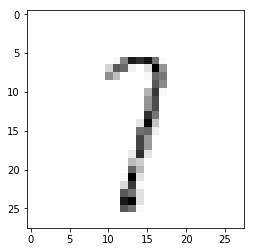

In [23]:
wrong=175
print("Prediction:",result[wrong],"\n","Answer:",y0_test[wrong],"\n","Index:",y_test[wrong])
plt.imshow(x0_test[wrong], cmap='Greys')

# ---END--- 

# ---Let's try to identify these hand-written numbers---

In [24]:
pick = np.random.randint(1,10,25)

In [25]:
x0_test.shape

(10000, 28, 28)

### Correct

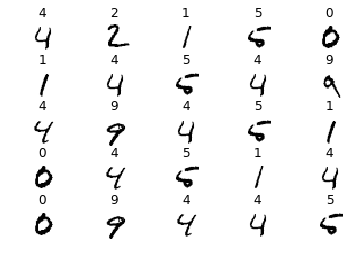

In [26]:
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(result[pick[i]])
    plt.imshow(x0_test[pick[i]], cmap='Greys')
    plt.axis("off")

### Incorrect

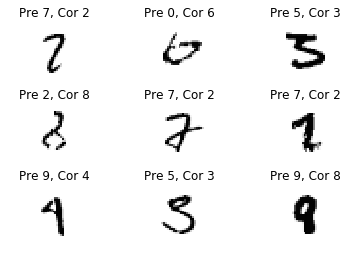

In [27]:
#plt.figure()
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x0_test[incorrect], cmap='Greys', interpolation='none')
    plt.title("Pre {}, Cor {}".format(result[incorrect], y0_test[incorrect])) #Predict, Correct
    plt.axis("off")

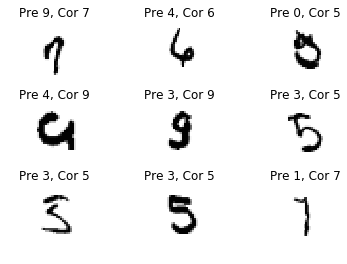

In [28]:
pick1 = np.random.randint(0,160,9)
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x0_test[incorrect_indices[pick1[i]]], cmap='Greys', interpolation='none')
    plt.title("Pre {}, Cor {}".format(result[incorrect_indices[pick1[i]]], y0_test[incorrect_indices[pick1[i]]])) #Predict, Correct
    #plt.title(y0_test[pick[i]]result[pick1[i]])
    plt.axis("off")